18/7/24 Che Pillay Code for the paper "Characterisation of genetically encoded redox sensor dynamics."

# Imports

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy as sp
import seaborn as sns
import os
from scipy.stats import ttest_ind_from_stats
from scipy.stats import norm
#plt.rcParams["text.usetex"] = True
backupdir = os.getcwd()
os.chdir(backupdir)

## <span style="color:black"> Figure 1 data </span>

This is the idealised sensor dataset

In [3]:
#x-axis ranges from -5 and 5 with .001 steps
x1 = np.arange(0, 50, 0.001)
x2= np.arange(0, 50, 0.001)
x3=np.arange(0, 50, 0.001)

y1=norm.pdf(x1, 15, 2.0)
y2=norm.pdf(x2, 15, 2.2)
y3=norm.pdf(x3, 15, 2.4)
y4=norm.pdf(x3, 15, 2.7)

#define multiple normal distributions
#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x1, y1,'k-', label='μ: 0, σ: 1')
plt.plot(x2, y2,'b-', label='μ:0, σ: 1.5')
plt.plot(x3, y3,'r-', label='μ:0, σ: 2')
plt.plot(x3, y4,'g-', label='μ:0, σ: 2')
plt.xlabel('Time (min)', size=14)
plt.ylabel('Signal', size=14)
plt.ylim(0,0.25)
plt.xlim(0,35)

#add legend to plot
#plt.legend()
#plt.savefig('sigparm explained_time.png', dpi=400)


(0.0, 35.0)

Text(0, 0.5, 'OxD')

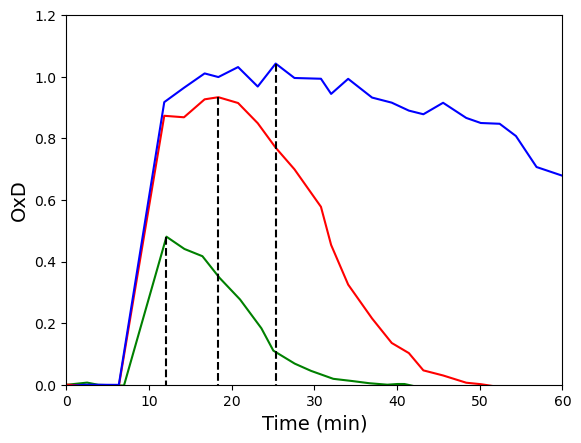

In [5]:
#deCubas Hyper dataset
#Actual signal is very different to 'ideal' signal
hyper_data = pd.read_excel ("Hyper_deCubas.xlsx", sheet_name='all')

#Calculuting the max (peak) of each curve
x = hyper_data.Time_o
y = hyper_data.Signal_o
xmax_o = x[np.argmax(y)]
ymax_o = y.max()

x = hyper_data.Time_c
y = hyper_data.Signal_c
xmax_c = x[np.argmax(y)]
ymax_c = y.max()

x = hyper_data.Time_c
y = hyper_data.Signal_p
xmax_p = x[np.argmax(y)]
ymax_p = y.max()

#Plot of data
plt.plot(hyper_data.Time_o, hyper_data.Signal_o, color='green', linestyle='-', label='WT')
plt.plot(hyper_data.Time_c, hyper_data.Signal_c, color='red', linestyle='-')
plt.plot(hyper_data.Time_c, hyper_data.Signal_p, color='blue', linestyle='-')
plt.plot([xmax_o, xmax_o], [ymax_o, 0], color='black', linestyle='--')
plt.plot([xmax_c, xmax_c], [ymax_c, 0], color='black', linestyle='--')
plt.plot([xmax_p, xmax_p], [ymax_p, 0], color='black', linestyle='--')
plt.ylim(0,1.2)
plt.xlim(0,60)

plt.xlabel('Time (min)', size=14)
plt.ylabel('OxD', size=14)

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pillayc3\AppData\Local\Temp\ipykernel_10316\100563415.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(car_dtpx1.Time, car_dtpx1.OxD, 'ro-', label='$\Delta$$tpx1$')


Text(0, 0.5, 'OxD')

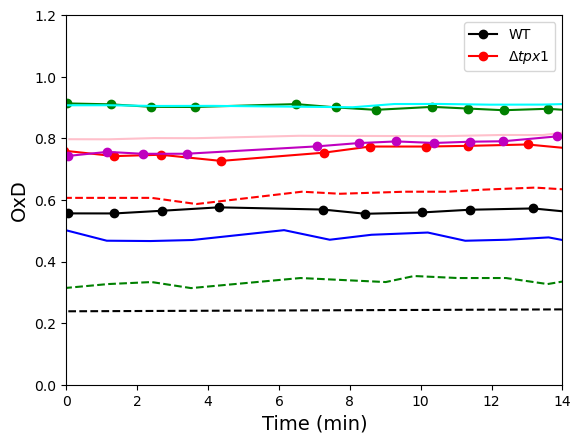

In [10]:
#Carmono rhoGFP dataset. Wildtype baseline sensor output from rhoGFP vs mutants
car_WT = pd.read_excel ("Carmona.xlsx", sheet_name='WT')
car_dtpx1 = pd.read_excel ("Carmona.xlsx", sheet_name='dtpx1')
car_dgrx1 = pd.read_excel ("Carmona.xlsx", sheet_name='dgrx1')
car_dpgr1 = pd.read_excel ("Carmona.xlsx", sheet_name='dpgr1')
car_dtrx1 = pd.read_excel ("Carmona.xlsx", sheet_name='dtrx1')
car_dtrx1dtrx2 = pd.read_excel ("Carmona.xlsx", sheet_name='dtrx1dtrx2') #mutant is actually dtrx3- worksheet misnamed
car_dcoq4 = pd.read_excel ("Carmona.xlsx", sheet_name='dcoq4')
car_dpka1 = pd.read_excel ("Carmona.xlsx", sheet_name='dpka1')
car_dpka1sty1 = pd.read_excel ("Carmona.xlsx", sheet_name='dpkadsty1')
car_dpyp1 = pd.read_excel ("Carmona.xlsx", sheet_name='dpyp1')

plt.plot(car_WT.Time, car_WT.OxD, 'ko-', label='WT')
plt.plot(car_dtpx1.Time, car_dtpx1.OxD, 'ro-', label='$\Delta$$tpx1$')
plt.plot(car_dgrx1.Time, car_dgrx1.OxD, 'go-')
plt.plot(car_dpgr1.Time, car_dpgr1.OxD, color='cyan', linestyle='solid')
plt.plot(car_dtrx1.Time, car_dtrx1.OxD, color='blue', linestyle='solid')
plt.plot(car_dtrx1dtrx2.Time, car_dtrx1dtrx2.OxD, color='pink', linestyle='solid')
plt.plot(car_dcoq4.Time, car_dcoq4.OxD, 'mo-')
plt.plot(car_dpka1.Time, car_dpka1.OxD, 'k--')
plt.plot(car_dpka1sty1.Time, car_dpka1sty1.OxD, 'r--')
plt.plot(car_dpyp1.Time, car_dpyp1.OxD, 'g--')
plt.legend()
plt.ylim(0,1.2)
plt.xlim(0,14)
plt.xlabel('Time (min)', size=14)
plt.ylabel('OxD', size=14)

# <span style="color:green"> Figure 1 plot </span>

In [91]:
fig=plt.figure(figsize=(9, 8))

##Idealised sensor output##
#x-axis ranges from -5 and 5 with .001 steps
x1 = np.arange(0, 50, 0.001)
x2= np.arange(0, 50, 0.001)
x3=np.arange(0, 50, 0.001)
y1=norm.pdf(x1, 15, 1.8)
y2=norm.pdf(x2, 15, 2.0)
y3=norm.pdf(x3, 15, 2.3)
y4=norm.pdf(x3, 15, 2.7)
#Plot
ax1 = fig.add_subplot(221)
#ax1.plot(x1, y1,'k-', label='μ: 0, σ: 1')
ax1.plot(x2, y2,'b-', label='μ:0, σ: 1.5')
ax1.plot(x3, y3,'r-', label='μ:0, σ: 2')
ax1.plot(x3, y4,'g-', label='μ:0, σ: 2')
ax1.set_xlabel('Time (min)', size=14)
ax1.set_ylabel('Signal', size=14)
ax1.set_ylim(0,0.25)
ax1.set_xlim(0,30)            
#ax1.annotate(r'A', xy=(-0.07,1.06),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

##Realistic dataset deCubas et al##
#deCubas Hyper dataset
#Actual signal is very different to 'ideal' signal
hyper_data = pd.read_excel ("Hyper_deCubas.xlsx", sheet_name='all')
#Calculuting the max (peak) of each curve
x = hyper_data.Time_o
y = hyper_data.Signal_o
xmax_o = x[np.argmax(y)]
ymax_o = y.max()
x = hyper_data.Time_c
y = hyper_data.Signal_c
xmax_c = x[np.argmax(y)]
ymax_c = y.max()
x = hyper_data.Time_c
y = hyper_data.Signal_p
xmax_p = x[np.argmax(y)]
ymax_p = y.max()
#Plot of data
ax1 = fig.add_subplot(222)
ax1.plot(hyper_data.Time_o, hyper_data.Signal_o, color='green', linestyle='-', label='WT')
ax1.plot(hyper_data.Time_c, hyper_data.Signal_c, color='red', linestyle='-')
ax1.plot(hyper_data.Time_c, hyper_data.Signal_p, color='blue', linestyle='-')
ax1.plot([xmax_o, xmax_o], [ymax_o, 0], color='black', linestyle='--')
ax1.plot([xmax_c, xmax_c], [ymax_c, 0], color='black', linestyle='--')
ax1.plot([xmax_p, xmax_p], [ymax_p, 0], color='black', linestyle='--')
ax1.set_ylim(0,1.2)
ax1.set_xlim(0,60)
ax1.set_xlabel('Time (min)', size=14)
ax1.set_ylabel('OxD', size=14)
#ax1.annotate(r'B', xy=(-0.07,1.06),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

##Fission yeast model
#Plot of data

##The effect of mutations on the baseline
#Carmono rhoGFP dataset. Wildtype baseline sensor output from rhoGFP vs mutants
car_WT = pd.read_excel ("Carmona.xlsx", sheet_name='WT')
car_dtpx1 = pd.read_excel ("Carmona.xlsx", sheet_name='dtpx1')
car_dgrx1 = pd.read_excel ("Carmona.xlsx", sheet_name='dgrx1')
car_dpgr1 = pd.read_excel ("Carmona.xlsx", sheet_name='dpgr1')
car_dtrx1 = pd.read_excel ("Carmona.xlsx", sheet_name='dtrx1')
car_dtrx1dtrx2 = pd.read_excel ("Carmona.xlsx", sheet_name='dtrx1dtrx2') #mutant is actually dtrx3- worksheet misnamed
car_dcoq4 = pd.read_excel ("Carmona.xlsx", sheet_name='dcoq4')
car_dpka1 = pd.read_excel ("Carmona.xlsx", sheet_name='dpka1')
car_dpka1sty1 = pd.read_excel ("Carmona.xlsx", sheet_name='dpkadsty1')
car_dpyp1 = pd.read_excel ("Carmona.xlsx", sheet_name='dpyp1')
#Plot of data
ax1 = fig.add_subplot(224)
ax1.plot(car_WT.Time, car_WT.OxD, 'o-', color='black', label='WT')
ax1.plot(car_dtpx1.Time, car_dtpx1.OxD, 'o-', color='blue', label='$\Delta$$tpx1$')
ax1.plot(car_dgrx1.Time, car_dgrx1.OxD, 'o-', color='xkcd:scarlet', label='$\Delta$$grx1$')
#ax1.plot(car_dpgr1.Time, car_dpgr1.OxD, 'o-', color='xkcd:green', label='$\Delta$$pgr1$')
ax1.plot(car_dtrx1.Time, car_dtrx1.OxD, 'o-', color='xkcd:grey', label='$\Delta$$trx1$')
#ax1.plot(car_dtrx1dtrx2.Time, car_dtrx1dtrx2.OxD, 'o-', color='xkcd:light blue', label='$\Delta$$trx1trx2$')
#ax1.plot(car_dcoq4.Time, car_dcoq4.OxD, 'o-', color='xkcd:pink', label='$\Delta$$coq4$')
ax1.plot(car_dpka1.Time, car_dpka1.OxD, 'o-', color='xkcd:turquoise', label='$\Delta$$pka1$')
#ax1.plot(car_dpka1sty1.Time, car_dpka1sty1.OxD, 'o-', color='orange', label='$\Delta$$pka1sty1$')
ax1.plot(car_dpyp1.Time, car_dpyp1.OxD, 'o-', color='red', label='$\Delta$$pyp1$')
#ax1.legend()
ax1.set_ylim(0.0,1.2)
ax1.set_xlim(0,14)
ax1.set_xlabel('Time (min)', size=14)
ax1.set_ylabel('OxD', size=14)
#ax1.annotate(r'D', xy=(-0.07,1.3),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)
ax1.annotate(r'$\Delta$$grx1$', xy=(1.1,0.78),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='xkcd:scarlet', size=12)
ax1.annotate(r'$\Delta$$tpx1$', xy=(1.1,0.65),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='blue', size=12)
ax1.annotate(r'WT', xy=(1.1,0.49),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='black', size=12)
ax1.annotate(r'$\Delta$$pka1$', xy=(1.1,0.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='xkcd:turquoise', size=12)
ax1.annotate(r'$\Delta$$pyp1$', xy=(1.1,0.25),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='red', size=12)
ax1.annotate(r'$\Delta$$trx1$', xy=(1.1,0.375),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='xkcd:grey', size=12)

fig.subplots_adjust(wspace=0.5, hspace=0.9, right=0.9, top=0.7)
fig.savefig('Fig1_sensor', dpi=400)


<>:73: SyntaxWarning: invalid escape sequence '\D'
<>:74: SyntaxWarning: invalid escape sequence '\D'
<>:76: SyntaxWarning: invalid escape sequence '\D'
<>:79: SyntaxWarning: invalid escape sequence '\D'
<>:81: SyntaxWarning: invalid escape sequence '\D'
<>:73: SyntaxWarning: invalid escape sequence '\D'
<>:74: SyntaxWarning: invalid escape sequence '\D'
<>:76: SyntaxWarning: invalid escape sequence '\D'
<>:79: SyntaxWarning: invalid escape sequence '\D'
<>:81: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pillayc3\AppData\Local\Temp\ipykernel_13868\3370993805.py:73: SyntaxWarning: invalid escape sequence '\D'
  ax1.plot(car_dtpx1.Time, car_dtpx1.OxD, 'o-', color='blue', label='$\Delta$$tpx1$')
C:\Users\pillayc3\AppData\Local\Temp\ipykernel_13868\3370993805.py:74: SyntaxWarning: invalid escape sequence '\D'
  ax1.plot(car_dgrx1.Time, car_dgrx1.OxD, 'o-', color='xkcd:scarlet', label='$\Delta$$grx1$')
C:\Users\pillayc3\AppData\Local\Temp\ipykernel_13868\3370993805.py:76: SyntaxWar

# <span style="color:black"> Figure 2: Probe sensitivity </span>

A-B:  Hyper7 and RhoGFP_TSAdeltaCr data from Kristilogu et al placed into Krist_sns.xlsx and plotted using Seaborn so that the sd deviations of the traces could be clear. Note the format used in. 
B-D I calculated the signal parameters by taking the replicates from the Kristilogu paper (pari.xlsx) and determing the signal parameters. Tne parameters were then collected into a single xlsx file "Krist_sns.xlsx"

Below is the a sample of the code used to visualise the data and calculate signal parameters


## Figure 2 data 

In [3]:
#View the data
xls = pd.ExcelFile('pari.xlsx')
df1 = pd.read_excel(xls, 'hyper2B')
df1.head()

Time  H0uM_1  H0uM_2  H0uM_3  H1uM_1  H1uM_2  H1uM_3  H5uM_1  H5uM_2  \
0  0.00   0.392   0.393   0.396   0.392   0.393   0.395   0.390   0.390   
1  2.25   0.389   0.390   0.393   0.389   0.389   0.393   0.387   0.390   
2  4.50   0.387   0.390   0.391   0.387   0.389   0.389   0.384   0.386   
3  6.75   0.384   0.387   0.388   0.385   0.386   0.388   0.381   0.384   
4  9.00   0.379   0.384   0.385   0.380   0.384   0.385   0.375   0.381   

   H5uM_3  ...  H10uM_3  H20uM_1  H20uM_2  H20uM_3  H50uM_1  H50uM_2  H50uM_3  \
0   0.394  ...    0.393    0.389    0.390    0.390    0.389    0.390    0.393   
1   0.390  ...    0.389    0.385    0.387    0.389    0.386    0.386    0.389   
2   0.388  ...    0.389    0.384    0.386    0.388    0.383    0.385    0.388   
3   0.388  ...    0.385    0.381    0.384    0.384    0.379    0.384    0.387   
4   0.384  ...    0.382    0.376    0.383    0.381    0.375    0.380    0.384   

   H100uM_1  H100uM_2  H100uM_3  
0     0.386     0.389     0.392  
1     0.385     0.388     0.390  
2     0.383     0.386     0.387  
3     0.379     0.382     0.385  
4     0.376     0.377     0.381  

[5 rows x 22 columns]

In [6]:
# Calculation of signal parameters
def signalpar1(y):
    x=df1.Time
    x= x.dropna()
    y = y.dropna()
    I = sp.integrate.trapezoid(y,x)
    T = sp.integrate.trapezoid(y*x,x)
    Tau = T/I
    Q = sp.integrate.trapezoid(y*x**2,x)
    Theta = np.lib.scimath.sqrt(Q/I - Tau**2)
    A = I/(2*Theta)
    print ('Ii = ', I)
    print ('A = ', A)
    print ('Tau = ', Tau)
    print ('Theta = ', Theta)
    print('')

In [ ]:
#apply the calculation of signal parameters to entire xlsx sheet. Ignore the 1st set of data because that is time
print ('ignore first set of data')
result=df1.apply(signalpar1)

# <span style="color:green"> Figure 2 plot </span>

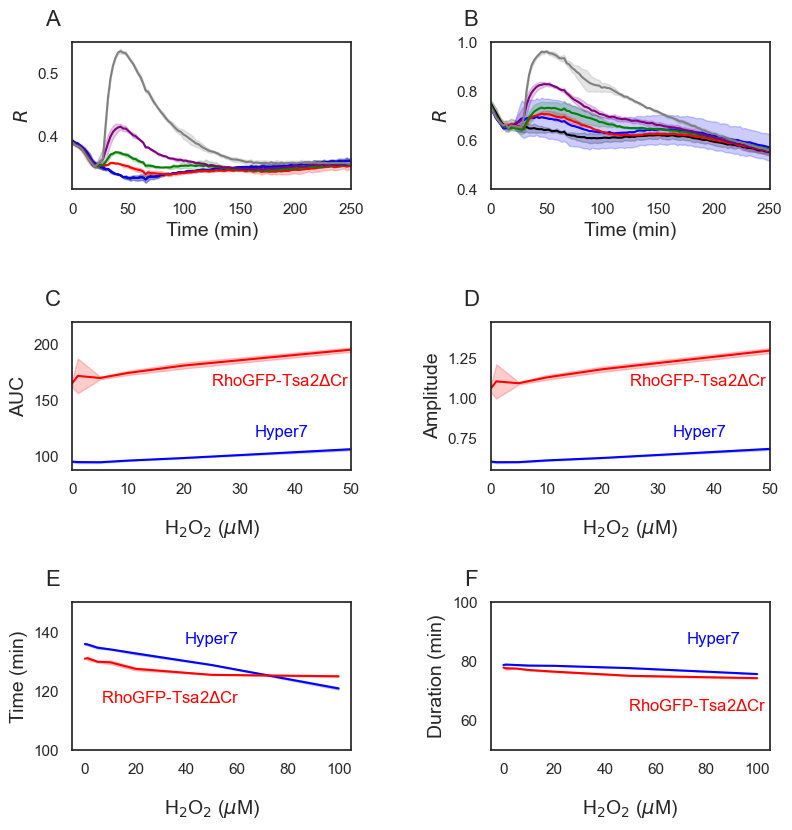

In [5]:


fig=plt.figure(figsize=(9, 12))
sns.set()
sns.set_theme(style='white')

#data
hyper_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='hyper_low')
hyper_data.set_index('Time', inplace=True)
hyper_data=hyper_data.drop(['Signal_100'], axis=1)# remove 100 uM hydrogen peroxide signal to view low range
#hyper_data=hyper_data.drop(['Signal_50'], axis=1)# remove 50 uM hydrogen peroxide signal to view low range
tsa_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='tsa_low')
tsa_data.set_index('Time', inplace=True)
tsa_data=tsa_data.drop(['Signal_100'], axis=1)# remove 100 uM hydrogen peroxide signal to view low range
#tsa_data=tsa_data.drop(['Signal_50'], axis=1)# remove 50 uM hydrogen peroxide signal to view low range
AUC_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='AUC_low')
AUC_data.set_index('Concentration', inplace=True)
Amp_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='Amp_low')
Amp_data.set_index('Concentration', inplace=True)
Time_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='Time_low')
Time_data.set_index('Concentration', inplace=True)
Dur_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='Dur_low')
Dur_data.set_index('Concentration', inplace=True)


ax1 = fig.add_subplot(321)
#palette=sns.color_palette("bright")
palette=('black', 'blue', 'red', 'green', 'purple', 'grey')
sns.lineplot(data=hyper_data, errorbar='sd',legend=False, dashes=False, palette=palette )
#ax.set(xlabel='x-axis label', ylabel='y-axis label')
plt.xlabel('Time (min)', size=14)
plt.ylabel(r'$R$', size=14)
#plt.ylim(0,1.2)
plt.xlim(0,250)
ax1.annotate(r'A', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

ax1 = fig.add_subplot(322)
#palette=sns.color_palette("bright")
palette=('black', 'blue', 'red', 'green', 'purple', 'grey')
sns.lineplot(data=tsa_data, errorbar='sd',legend=False, dashes=False, palette=palette )
#ax.set(xlabel='x-axis label', ylabel='y-axis label')
plt.xlabel('Time (min)', size=14)
plt.ylabel(r'$R$', size=14)
#plt.ylim(0,1.2)
plt.ylim(0.4,1.0)
plt.xlim(0,250)
ax1.annotate(r'B', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

ax1 = fig.add_subplot(323)
palette=('blue', 'red', 'green', 'purple', 'grey')
sns.lineplot(data=AUC_data, errorbar='sd',legend=False, dashes=False, palette=palette )
plt.xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=14)
plt.ylabel(r'AUC', size=14)
plt.xlim(0,50)
ax1.annotate(r'C', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)
ax1.annotate(r'RhoGFP-Tsa2$\Delta$Cr', xy=(0.745,0.6),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='red', size=12)
ax1.annotate(r'Hyper7', xy=(0.75,0.25),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='blue', size=12)


ax1 = fig.add_subplot(324)
palette=('blue', 'red', 'green', 'purple', 'grey')
sns.lineplot(data=Amp_data, errorbar='sd',legend=False, dashes=False, palette=palette )
plt.xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=14)
plt.ylabel(r'Amplitude', size=14)
plt.xlim(0,50)
ax1.annotate(r'D', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)
ax1.annotate(r'RhoGFP-Tsa2$\Delta$Cr', xy=(0.745,0.6),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='red', size=12)
ax1.annotate(r'Hyper7', xy=(0.75,0.25),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='blue', size=12)


ax1 = fig.add_subplot(325)
palette=('blue', 'red', 'green', 'purple', 'grey')
sns.lineplot(data=Time_data, errorbar='sd',legend=False, dashes=False, palette=palette )
plt.xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=14)
plt.ylabel(r'Time (min)', size=14)
#plt.ylim(50,200)
plt.ylim(100,150)
ax1.annotate(r'E', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)
ax1.annotate(r'RhoGFP-Tsa2$\Delta$Cr', xy=(0.35,0.35),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='red', size=12)
ax1.annotate(r'Hyper7', xy=(0.5,0.75),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='blue', size=12)


ax1 = fig.add_subplot(326)
palette=('blue', 'red', 'green', 'purple', 'grey')
sns.lineplot(data=Dur_data, errorbar='sd',legend=False, dashes=False, palette=palette )
plt.xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=14)
plt.ylabel(r'Duration (min)', size=14)
plt.ylim(50,100)
ax1.annotate(r'F', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)
ax1.annotate(r'RhoGFP-Tsa2$\Delta$Cr', xy=(0.74,0.3),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='red', size=12)
ax1.annotate(r'Hyper7', xy=(0.8,0.75),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='blue', size=12)


fig.subplots_adjust(wspace=0.5, hspace=0.9, right=0.9, top=0.7)
fig.savefig('Fig2_sensor', dpi=400)
fig.savefig('Fig2_sensor.pdf', dpi=400)
##Note the 0 and 1 uM lines run on top of each other for the hyper probe




# <span style="color:green"> Figure 3: Probe comparison over a range </span>

In this figure I will plot the range of the Hyper7 and TSA RhoGFP probes 20-1000 uM where the probe signal appears to increase

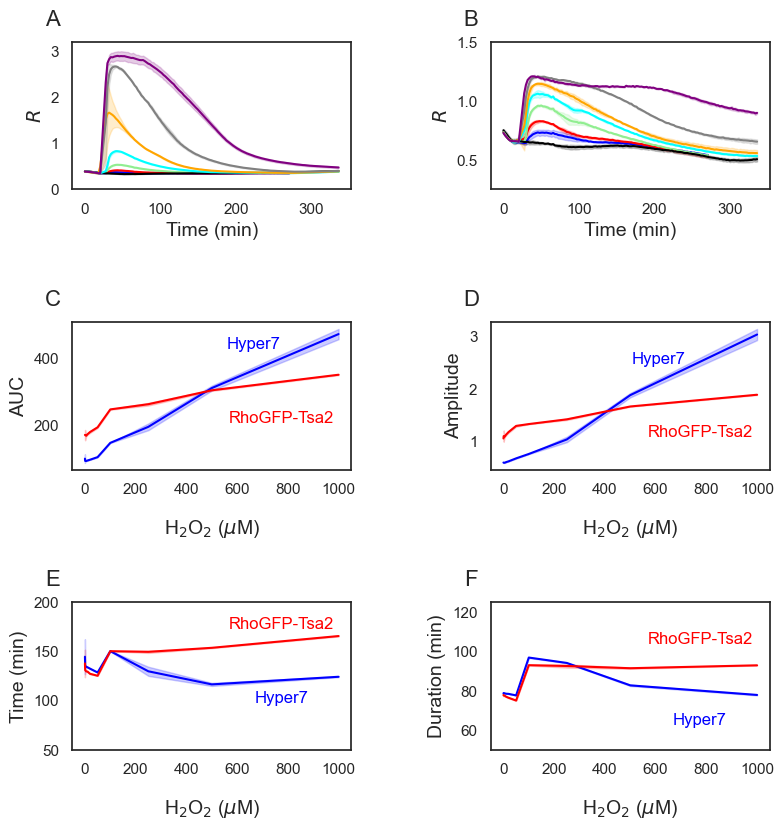

In [7]:

fig=plt.figure(figsize=(9, 12))
sns.set()
sns.set_theme(style='white')

#data
hyper_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='hyper_low')
hyper_data.set_index('Time', inplace=True)
# remove 0-5, 100 uM hydrogen peroxide signal. Remove 1-5 uM signal because it is noisy and inaccurate. 0 removed because I will use the zero from
#from the high range dataset. 100 uM appears in both the low and high range
hyper_data=hyper_data.drop(['Signal_0','Signal_1','Signal_5','Signal_100'], axis=1)
hyper_data_h = pd.read_excel ("Krist_sns.xlsx", sheet_name='hyper_high')
hyper_data_h.set_index('Time (min)', inplace=True)
tsa_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='tsa_low')
tsa_data.set_index('Time', inplace=True)
tsa_data=tsa_data.drop(['Signal_0','Signal_1','Signal_5','Signal_100'], axis=1)# # remove 0-5, 100 uM hydrogen peroxide signal 
tsa_data_h = pd.read_excel ("Krist_sns.xlsx", sheet_name='tsa_high')
tsa_data_h.set_index('Time', inplace=True)

AUC_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='AUC_full')
AUC_data.set_index('Concentration', inplace=True)
Amp_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='Amp_full')
Amp_data.set_index('Concentration', inplace=True)
Time_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='Time_full')
Time_data.set_index('Concentration', inplace=True)
Dur_data = pd.read_excel ("Krist_sns.xlsx", sheet_name='Dur_full')
Dur_data.set_index('Concentration', inplace=True)

ax1 = fig.add_subplot(321)
#palette=sns.color_palette("bright")
palette=('blue', 'red', 'lightgreen', 'purple', 'grey')
palette1=('black','cyan', 'orange', 'grey', 'purple')
sns.lineplot(data=hyper_data, errorbar='sd',legend=False, dashes=False, palette=palette )
sns.lineplot(data=hyper_data_h, errorbar='sd',legend=False, dashes=False, palette=palette1 )
#ax.set(xlabel='x-axis label', ylabel='y-axis label')
plt.xlabel('Time (min)', size=14)
plt.ylabel(r'$R$', size=14)
plt.ylim(0,3.2)
#plt.xlim(0,250)
ax1.annotate(r'A', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

ax1 = fig.add_subplot(322)
palette=('blue', 'red', 'lightgreen', 'purple', 'grey')
palette1=('black','cyan', 'orange', 'grey', 'purple')
sns.lineplot(data=tsa_data, errorbar='sd',legend=False, dashes=False, palette=palette )
sns.lineplot(data=tsa_data_h, errorbar='sd',legend=False, dashes=False, palette=palette1 )
#ax.set(xlabel='x-axis label', ylabel='y-axis label')
plt.xlabel('Time (min)', size=14)
plt.ylabel(r'$R$', size=14)
plt.ylim(0.25,1.5)
#plt.xlim(0,250)
ax1.annotate(r'B', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

ax1 = fig.add_subplot(323)
palette=('blue', 'red', 'green', 'purple', 'grey')
sns.lineplot(data=AUC_data, errorbar='sd',legend=False, dashes=False, palette=palette )
plt.xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=14)
plt.ylabel(r'AUC', size=14)
#plt.xlim(0,50)
ax1.annotate(r'RhoGFP-Tsa2', xy=(0.75,0.35),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='red', size=12)
ax1.annotate(r'Hyper7', xy=(0.65,0.85),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='blue', size=12)
ax1.annotate(r'C', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

ax1 = fig.add_subplot(324)
palette=('blue', 'red', 'green', 'purple', 'grey')
sns.lineplot(data=Amp_data, errorbar='sd',legend=False, dashes=False, palette=palette )
plt.xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=14)
plt.ylabel(r'Amplitude', size=14)
#plt.xlim(0,50)
ax1.annotate(r'RhoGFP-Tsa2', xy=(0.75,0.25),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='red', size=12)
ax1.annotate(r'Hyper7', xy=(0.6,0.75),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='blue', size=12)
ax1.annotate(r'D', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

ax1 = fig.add_subplot(325)
palette=('blue', 'red', 'green', 'purple', 'grey')
sns.lineplot(data=Time_data, errorbar='sd',legend=False, dashes=False, palette=palette )
plt.xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=14)
plt.ylabel(r'Time (min)', size=14)
plt.ylim(50,200)
ax1.annotate(r'E', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)
ax1.annotate(r'RhoGFP-Tsa2', xy=(0.75,0.85),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='red', size=12)
ax1.annotate(r'Hyper7', xy=(0.75,0.35),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='blue', size=12)


ax1 = fig.add_subplot(326)
palette=('blue', 'red', 'green', 'purple', 'grey')
sns.lineplot(data=Dur_data, errorbar='sd',legend=False, dashes=False, palette=palette )
plt.xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=14)
plt.ylabel(r'Duration (min)', size=14)
plt.ylim(50,125)
ax1.annotate(r'F', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)
ax1.annotate(r'RhoGFP-Tsa2', xy=(0.75,0.75),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='red', size=12)
ax1.annotate(r'Hyper7', xy=(0.75,0.2),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', color='blue', size=12)



fig.subplots_adjust(wspace=0.5, hspace=0.9, right=0.9, top=0.7)
fig.savefig('Fig3_sensor', dpi=400)
fig.savefig('Fig3_sensor.pdf', dpi=400)

# <span style="color:black"> Figure 4: System perturbations and analysis </span>

# Figure 4 Data
This data was obtained from  "The Mitochondria-to-Cytosol H2O2 Gradient Is Caused by Peroxiredoxin-Dependent Cytosolic Scavenging" Antioxidants (Basel). 2021 May; 10(5): 731 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8148214/#__ffn_sectitle
These data are found in the spreadsheet de_Cubas_2024
The negative OxD values seem to cause a problem for the integration. Therefore for calculating signal parameters, all negative values==0 (parameters_zero in xlxs)
I have retained the original parameters that were calculated with the raw data

In [14]:
#Sample code used for signal parameter analysis
#WT dataset
df1 = pd.read_excel ("de_Cubas_2024.xlsx", sheet_name='Hyper7')
print (df1)
#replace values < 0 with 0
df1=df1.mask(df1 < 0, 0)
df1

         Time        h0        h1        h2        h5       h10       h25  \
0   -0.003965 -0.003191  0.006413  0.006413  0.003195  0.006398 -0.003183   
1    2.839288 -0.006272  0.006499  0.006499 -0.003081 -0.009479  0.006488   
2    5.192226 -0.006178 -0.002995 -0.002995  0.000223 -0.002964  0.000211   
3    7.643203 -0.006080 -0.002619 -0.002619 -0.002882  0.000313 -0.002882   
4   14.015382  0.003759 -0.005701 -0.005701  0.035708  0.090032  0.214621   
5   16.270641 -0.005736 -0.015203 -0.015203  0.039004  0.106218  0.249883   
6   18.819656 -0.005634 -0.011903 -0.011903  0.048691  0.103113  0.259557   
7   22.054945 -0.005505 -0.011785 -0.011785  0.042395  0.103219  0.262866   
8   24.408243 -0.014996 -0.018077 -0.018077  0.039325  0.087339  0.250188   
9   27.251497 -0.018077 -0.017971 -0.017971  0.033053  0.084242  0.237510   
10  29.408356 -0.017991 -0.017869 -0.017869  0.029944  0.071580  0.224832   
11  31.957733 -0.027474 -0.024154 -0.024154  0.030042  0.065280  0.212155   

Time        h0        h1        h2        h5       h10       h25  \
0    0.000000  0.000000  0.006413  0.006413  0.003195  0.006398  0.000000   
1    2.839288  0.000000  0.006499  0.006499  0.000000  0.000000  0.006488   
2    5.192226  0.000000  0.000000  0.000000  0.000223  0.000000  0.000211   
3    7.643203  0.000000  0.000000  0.000000  0.000000  0.000313  0.000000   
4   14.015382  0.003759  0.000000  0.000000  0.035708  0.090032  0.214621   
5   16.270641  0.000000  0.000000  0.000000  0.039004  0.106218  0.249883   
6   18.819656  0.000000  0.000000  0.000000  0.048691  0.103113  0.259557   
7   22.054945  0.000000  0.000000  0.000000  0.042395  0.103219  0.262866   
8   24.408243  0.000000  0.000000  0.000000  0.039325  0.087339  0.250188   
9   27.251497  0.000000  0.000000  0.000000  0.033053  0.084242  0.237510   
10  29.408356  0.000000  0.000000  0.000000  0.029944  0.071580  0.224832   
11  31.957733  0.000000  0.000000  0.000000  0.030042  0.065280  0.212155   
12  34.506750  0.000000  0.000000  0.000000  0.026937  0.058992  0.183510   
13  37.448040  0.000000  0.000000  0.000000  0.023844  0.049536  0.151659   
14  40.291534  0.000000  0.000000  0.000000  0.011198  0.024091  0.145375   
15  42.937990  0.000000  0.000000  0.000000  0.000000  0.024177  0.126308   
16  45.683440  0.000000  0.000000  0.000000  0.001809  0.008300  0.104041   
17  47.741900  0.000000  0.000000  0.000000  0.000000  0.000000  0.081791   
18  50.682953  0.000000  0.000000  0.000000  0.000000  0.000000  0.075499   
19  53.232212  0.000000  0.000000  0.000000  0.000000  0.000000  0.059630   
20  58.134163  0.000000  0.000000  0.000000  0.000000  0.000000  0.043750   
21  60.683178  0.000000  0.000000  0.000000  0.000000  0.000000  0.043855   
22  62.840280  0.000000  0.000000  0.000000  0.000000  0.000000  0.024792   
23  65.977650  0.000000  0.000000  0.000000  0.000000  0.000000  0.015317   
24  68.918820  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25  70.977165  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26  73.428140  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27  76.173470  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28  78.526890  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29  80.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         h50      h100      h200     h1000  
0   0.000004  0.000000  0.000000  0.003211  
1   0.003297  0.000000  0.003316  0.000000  
2   0.000219  0.000000  0.000219  0.000000  
3   0.000000  0.000000  0.000000  0.000000  
4   0.428683  0.815260  0.971818  1.019721  
5   0.463920  0.789811  0.962331  1.003868  
6   0.464038  0.761151  0.952852  1.003954  
7   0.464128  0.726121  0.946560  1.004068  
8   0.445060  0.681490  0.930699  1.013766  
9   0.419623  0.643257  0.921228  1.001077  
10  0.387768  0.605024  0.879792  1.001182  
11  0.355917  0.566783  0.835166  0.991703  
12  0.327265  0.509389  0.784145  0.991813  
13  0.292234  0.471148  0.710765  0.998301  
14  0.257192  0.423331  0.650175  0.998410  
15  0.231743  0.372310  0.592765  0.995313  
16  0.196701  0.346861  0.551338  0.998614  
17  0.174439  0.311811  0.484339  0.985948  
18  0.139404  0.267192  0.446114  0.979668  
19  0.129910  0.235349  0.407865  0.995728  
20  0.088486  0.200307  0.372831  0.979864  
21  0.085397  0.187625  0.334598  0.979965  
22  0.056752  0.139808  0.293174  0.973673  
23  0.040868  0.120744  0.267709  0.945033  
24  0.034600  0.104883  0.235866  0.919576  
25  0.021910  0.076235  0.207225  0.897302  
26  0.015634  0.053969  0.188142  0.855893  
27  0.000000  0.057265  0.165888  0.808064  
28  0.000000  0.038202  0.146828  0.776205  
29  0.000000  0.025516  0.127756  0.750760

In [16]:
#Code for calculating signal parameters
def signalpar1(y):
    x=df1.Time
    x= x.dropna()
    y = y.dropna()
    I = sp.integrate.trapezoid(y,x)
    T = sp.integrate.trapezoid(y*x,x)
    Tau = T/I
    Q = sp.integrate.trapezoid(y*x**2,x)
    Theta = np.lib.scimath.sqrt(Q/I - Tau**2)
    A = I/(2*Theta)
    print ('Ii = ', I)
    print ('A = ', A)
    print ('Tau = ', Tau)
    print ('Theta = ', Theta)
    print('')

print ('ignore first set of data')
result=df1.apply(signalpar1)

ignore first set of data
Ii =  3199.9999999999995
A =  84.8805590731013
Tau =  53.377600698661155
Theta =  18.850017217983204

Ii =  0.016213941095548003
A =  48087.643763438966
Tau =  14.015382
Theta =  1.6858739404357614e-07

Ii =  0.025977748458541436
A =  0.009588164940391487
Tau =  1.8441878751809937
Theta =  1.3546778043578773

Ii =  0.025977748458541436
A =  0.009588164940391487
Tau =  1.8441878751809937
Theta =  1.3546778043578773

Ii =  1.0219367112275468
A =  0.06331624150917425
Tau =  24.253729439235546
Theta =  8.070099289449079

Ii =  2.469486172827354
A =  0.1446632031283211
Tau =  24.481312643014032
Theta =  8.535294806920724

Ii =  8.286479328284852
A =  0.3239940297370353
Tau =  30.044261598029976
Theta =  12.788012382528228

Ii =  15.468075867513077
A =  0.558959403750186
Tau =  30.870770420768768
Theta =  13.836493101050122

Ii =  26.7785340355488
A =  0.8542634052339182
Tau =  32.35135850239742
Theta =  15.673464338681454

Ii =  39.81431691836198
A =  1.160143408809

# <span style="color:green"> Figure 4 plot </span>

In [9]:
fig=plt.figure(figsize=(10, 13))
#sns.set()
#sns.set_theme(style='white')

#Data needed for plotting
xls = pd.ExcelFile('de_Cubas_2024.xlsx')
df1 = pd.read_excel(xls, 'Hyper7')
df2 = pd.read_excel(xls, 'dTrrHyper7')
df3 = pd.read_excel(xls, 'dTrxHyper7')
df4 = pd.read_excel(xls, 'AUC_zero')
df5 = pd.read_excel(xls, 'Amp_zero')
df6 = pd.read_excel(xls, 'Time_zero')
df7 = pd.read_excel(xls, 'Dur_zero')

#WT
ax1 = fig.add_subplot(321)
ax1.plot(df1.Time, df1.h0, 'o-', color='skyblue')
ax1.plot(df1.Time, df1.h1, 'o-', color='orange')
ax1.plot(df1.Time, df1.h5, 'o-', color='xkcd:purple')
ax1.plot(df1.Time, df1.h10, 'o-', color='xkcd:pea green')
ax1.plot(df1.Time, df1.h25, 'o-', color='xkcd:scarlet')
ax1.plot(df1.Time, df1.h50, 'o-', color='xkcd:bright blue')
ax1.plot(df1.Time, df1.h100, 'o-', color='xkcd:orange')
ax1.plot(df1.Time, df1.h200, 'o-', color='xkcd:turquoise')
ax1.plot(df1.Time, df1.h1000, 'o-', color='xkcd:purple')
ax1.set_ylabel(r'OxD', size=14)
ax1.set_xlabel(r'Time (min)', size=14)
plt.ylim(-0.25,1.2)
ax1.annotate(r'A', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

#Trr mutant
ax1 = fig.add_subplot(322)
ax1.plot(df2.Time, df2.h0, 'o-', color='skyblue')
ax1.plot(df2.Time, df2.h1, 'o-', color='orange')
ax1.plot(df2.Time, df2.h5, 'o-', color='xkcd:purple')
ax1.plot(df2.Time, df2.h10, 'o-', color='xkcd:pea green')
ax1.plot(df2.Time, df2.h25, 'o-', color='xkcd:scarlet')
ax1.plot(df2.Time, df2.h50, 'o-', color='xkcd:bright blue')
ax1.plot(df2.Time, df2.h100, 'o-', color='xkcd:orange')
ax1.plot(df2.Time, df2.h200, 'o-', color='xkcd:turquoise')
ax1.plot(df2.Time, df2.h1000, 'o-', color='xkcd:purple')
ax1.set_ylabel(r'OxD', size=14)
ax1.set_xlabel(r'Time (min)', size=14)
plt.ylim(-0.25,1.2)
ax1.annotate(r'B', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

#Trx mutant
ax1 = fig.add_subplot(323)
ax1.plot(df3.Time, df3.h0, 'o-', color='skyblue')
ax1.plot(df3.Time, df3.h1, 'o-', color='orange')
ax1.plot(df3.Time, df3.h5, 'o-', color='xkcd:purple')
ax1.plot(df3.Time, df3.h10, 'o-', color='xkcd:pea green')
ax1.plot(df3.Time, df3.h25, 'o-', color='xkcd:scarlet')
ax1.plot(df3.Time, df3.h50, 'o-', color='xkcd:bright blue')
ax1.plot(df3.Time, df3.h100, 'o-', color='xkcd:orange')
ax1.plot(df3.Time, df3.h200, 'o-', color='xkcd:turquoise')
ax1.plot(df3.Time, df3.h1000, 'o-', color='xkcd:purple')
ax1.set_ylabel(r'OxD', size=14)
ax1.set_xlabel(r'Time (min)', size=14)
plt.ylim(-0.25,1.2)
ax1.annotate(r'C', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)

#Amplitude comparisons
ax1 = fig.add_subplot(324)
ax1.plot(df5.Conc, df5.Hyper7, 'o-', color='black', label='WT')
ax1.plot(df5.Conc, df5.dTrrHyper7, 'o-', color='skyblue', label=r'$\Delta$ $trr1$')
ax1.plot(df5.Conc, df5.dTrxHyper7, 'o-', color='red', label=r'$\Delta$ $trx1$')
ax1.set_ylabel(r'Amplitude', size=14)
ax1.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=14)
ax1.annotate(r'D', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)
ax1.legend(frameon=False)

#Time comparisons
ax1 = fig.add_subplot(325)
ax1.plot(df6.Conc, df6.Hyper7, 'o-', color='black', label='WT')
ax1.plot(df6.Conc, df6.dTrrHyper7, 'o-', color='skyblue', label=r'$\Delta$ $trr1$')
ax1.plot(df6.Conc, df6.dTrxHyper7, 'o-', color='red', label=r'$\Delta$ $trx1$')
ax1.set_ylabel(r'Time (min)', size=14)
ax1.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=14)
plt.ylim(0,60)
plt.xlim(0,200)
ax1.annotate(r'E', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)
ax1.legend(frameon=False)


#Duration comparisons
ax1 = fig.add_subplot(326)
ax1.plot(df7.Conc, df7.Hyper7, 'o-', color='black', label=r'WT')
ax1.plot(df7.Conc, df7.dTrrHyper7, 'o-', color='skyblue', label=r'$\Delta$ $trr1$')
ax1.plot(df7.Conc, df7.dTrxHyper7, 'o-', color='red', label=r'$\Delta$ $trx1$')
ax1.set_ylabel(r'Duration (min)', size=14)
ax1.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=14)
plt.ylim(0,30)
plt.xlim(0,200)
ax1.annotate(r'F', xy=(-0.07,1.15),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=16)
ax1.legend(frameon=False)

fig.subplots_adjust(wspace=0.5, hspace=0.9, right=0.9, top=0.7)
fig.savefig('Fig4_sensor', dpi=400)
fig.savefig('Fig4_sensor.pdf', dpi=400)

# <span style="color:black"> Google Colab Code </span>

AUC =  160.0
Signal Time =  3.125
Signal Duration =  1.243734296383275
Amplitude =  64.32242017658957


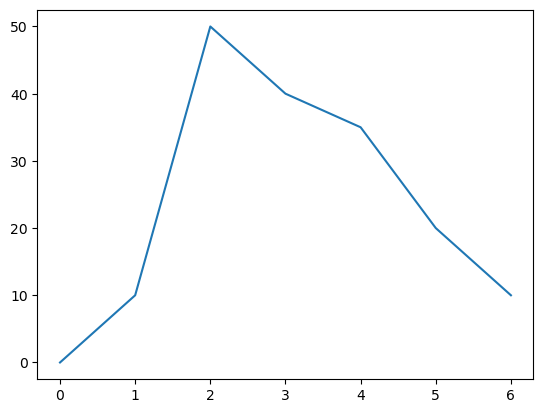

In [4]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy as sp

x=np.array([0,1,2,3,4,5,6])
y=np.array([0, 10, 50, 40, 35, 20, 10])
plt.plot(x,y)
I = sp.integrate.trapezoid(y,x)
T = sp.integrate.trapezoid(y*x,x)
Tau = T/I
Q = sp.integrate.trapezoid(y*x**2,x)
Theta = np.lib.scimath.sqrt(Q/I - Tau**2)
A = I/(2*Theta)
print ('AUC = ', I)
print ('Signal Time = ', Tau)
print ('Signal Duration = ', Theta)
print ('Amplitude = ', A)